In [1]:
import neuralnet as nn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
np.random.seed(123)

In [2]:
TRAIN_IN, _ = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
TRAIN_IN = [np.reshape(x, (28,28,1)) for x in TRAIN_IN]
TRAIN_OUT = [np.concatenate((x,x,x), axis=2) for x in TRAIN_IN]
N = 2
a = 0.0001

In [3]:
model = nn.Conv2D(1,3)
trainer = nn.Trainer2D(model, TRAIN_IN, TRAIN_OUT)

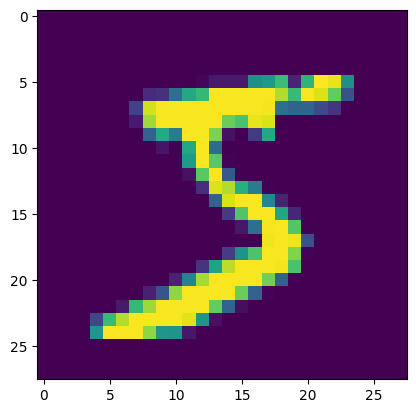

In [4]:
plt.imshow(TRAIN_IN[0])

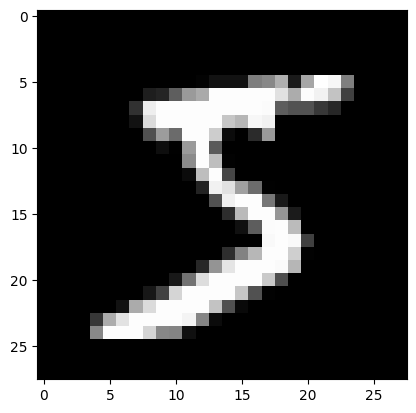

In [5]:
plt.imshow(TRAIN_OUT[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


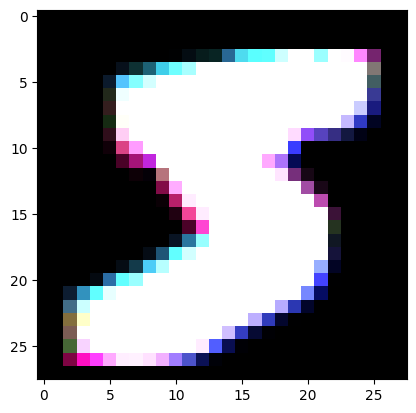

In [6]:
out = model.forward(TRAIN_IN[0])
plt.imshow(out)

In [ ]:
err = out - TRAIN_OUT[0]
back = model.backward(err)
plt.imshow(back)
plt.colorbar()

: 

In [ ]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of model complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()